***Importing-Libraries***

In [ ]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

***Loading-Stock-Data***

In [4]:
df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
df.head()

/tmp/ipython-input-210/1352214392.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.400536,72.460799,71.156697,71.409800,135480400
2020-01-03,71.696640,72.455958,71.472462,71.629145,146322800
2020-01-06,72.267929,72.306499,70.568503,70.819201,118387200
2020-01-07,71.928062,72.533103,71.708703,72.277586,108872000
2020-01-08,73.085098,73.386416,71.631544,71.631544,132079200


In [5]:
df = df[["Close"]]
df.head()

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.400536
2020-01-03,71.696640
2020-01-06,72.267929
2020-01-07,71.928062
2020-01-08,73.085098


In [6]:
df["Target"] = df["Close"].shift(-1)
df.head()

Price,Close,Target
Ticker,AAPL,
Date,,
2020-01-02,72.400536,71.696640
2020-01-03,71.696640,72.267929
2020-01-06,72.267929,71.928062
2020-01-07,71.928062,73.085098
2020-01-08,73.085098,74.637489


In [7]:
df = df.dropna()

In [8]:
X = df[["Close"]]
y = df["Target"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

***Train-m0del***

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

***Prediction***

In [11]:
predictions = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.5940031297615547


***Ptlot-Actual-vs-Predicted***

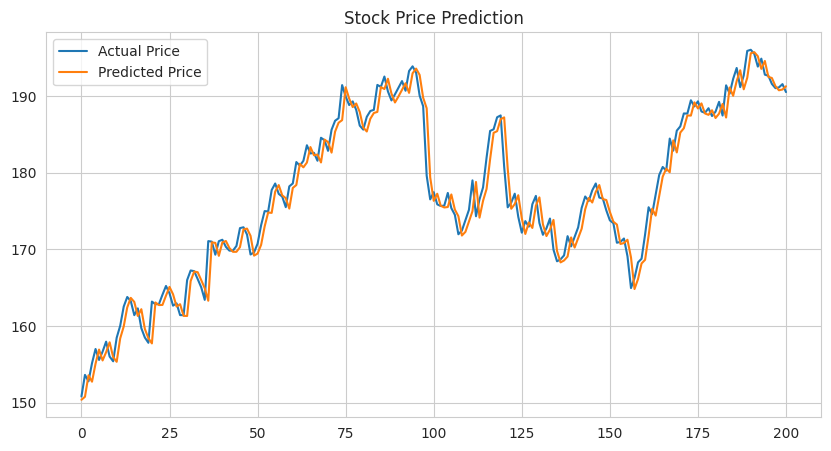

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("Stock Price Prediction")
plt.show()